# Problem 3- ETL - Python Solution
The below given json file contains data related to orchestra, theirs concerts, works, artists, etc. Since the data is in nested JSON format, its not possible to conduct any analysis on the raw data.

[nested_data](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/98b0fa4b-2a85-40e0-af20-5a2785c55c92/Untitled.json)

You are required to:

1. Load the data and perform transformations to simply the data and store it a normalized manner into smaller tables which are easier to analyze
2. Prepare an ERD of the normalized data tables showing relationships between the various entities
3. Implement the transformation using python and SQL both and submit two separate solutions

In [8]:
import json
import pandas as pd 

In [9]:
# Reading the Json file : 
with open('nested_data.json','r') as f:
    json_data = json.load(f)

In [10]:
json_data

{'programs': [{'season': '1842-43',
   'orchestra': 'New York Philharmonic',
   'concerts': [{'Date': '1842-12-07T05:00:00Z',
     'eventType': 'Subscription Season',
     'Venue': 'Apollo Rooms',
     'Location': 'Manhattan, NY',
     'Time': '8:00PM'}],
   'programID': '3853',
   'works': [{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP.67',
     'conductorName': 'Hill, Ureli Corelli',
     'ID': '52446*',
     'soloists': [],
     'composerName': 'Beethoven,  Ludwig  van'},
    {'workTitle': 'OBERON',
     'composerName': 'Weber,  Carl  Maria Von',
     'conductorName': 'Timm, Henry C.',
     'ID': '8834*4',
     'soloists': [{'soloistName': 'Otto, Antoinette',
       'soloistRoles': 'S',
       'soloistInstrument': 'Soprano'}],
     'movement': '"Ozean, du Ungeheuer" (Ocean, thou mighty monster), Reiza (Scene and Aria), Act II'},
    {'workTitle': 'QUINTET, PIANO, D MINOR, OP. 74',
     'ID': '3642*',
     'soloists': [{'soloistName': 'Scharfenberg, William',
       'soloistRoles': 'A

### Exploring about the data with Json Tree Structure Viewer to get a better understanding of the data 

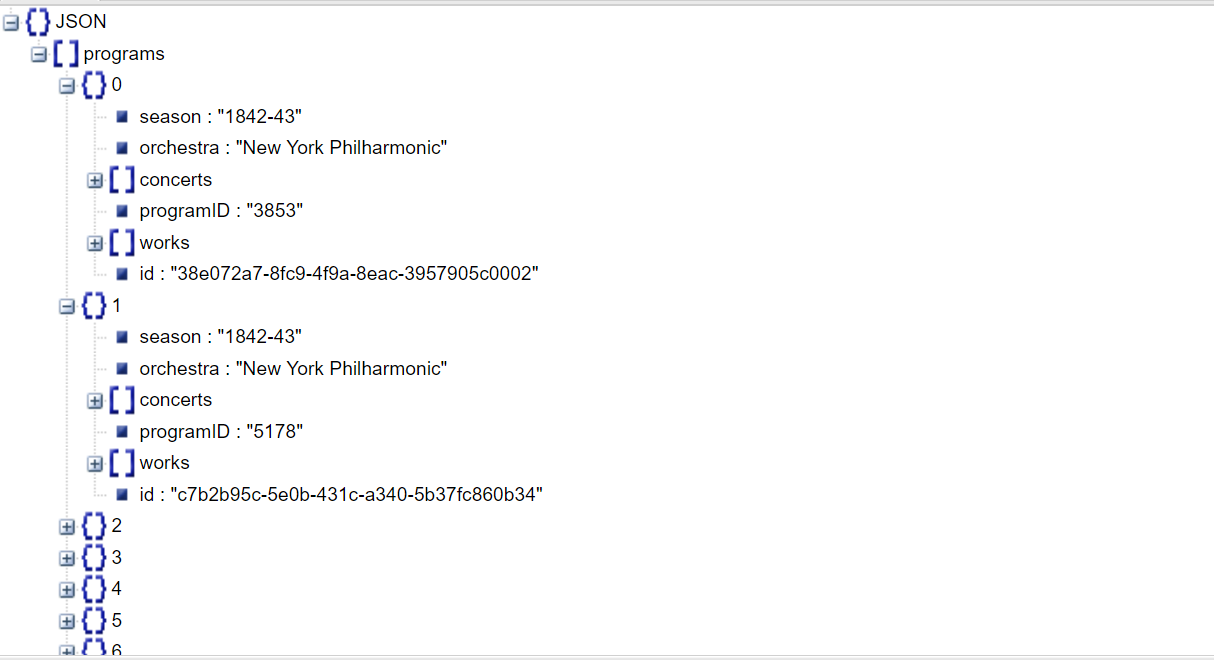

We see that the concerts and work attribute has sub features and their count can vary  

## 1-> Python Solution
### Approach : 

We use a function from pandas library called as **json_normalize** 

Json_Normalize function parses the data and its parameters help us get all the information 


In [11]:
# All the programs are inside value of the programs key 
# Hence we start with the programs key 

all_programs = json_data['programs']


### There are 13954 records present 

In [12]:
len(all_programs)

13954

### Implementing the pd.json_normalize initially :


In [13]:
df = pd.json_normalize(all_programs)
df

,season,orchestra,concerts,programID,works,id
0,1842-43,New York Philharmonic,"[{'Date': '1842-12-07T05:00:00Z', 'eventType':...",3853,"[{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....",38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,"[{'Date': '1843-02-18T05:00:00Z', 'eventType':...",5178,[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,"[{'Date': '1843-04-07T05:00:00Z', 'eventType':...",10785,"[{'workTitle': 'EGMONT, OP.84', 'composerName'...",894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,"[{'Date': '1843-04-22T05:00:00Z', 'eventType':...",5887,"[{'workTitle': 'SYMPHONY NO. 2 IN D MAJOR, OP....",34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,"[{'Date': '1843-11-18T05:00:00Z', 'eventType':...",305,"[{'workTitle': 'SYMPHONY NO. 7 IN A MAJOR, OP....",610a4acc-94e4-4cd6-bdc1-8ad020edc7e9
...,...,...,...,...,...,...
13949,2016-17,Musicians from the New York Philharmonic,"[{'Date': '2017-06-24T04:00:00Z', 'eventType':...",14189,"[{'workTitle': 'QUARTET, STRING, NO. 3 (MISHIM...",3d50968c-2e8b-405f-969c-ba36f941f393
13950,2016-17,New York Philharmonic,"[{'Date': '2017-07-02T04:00:00Z', 'eventType':...",14146,"[{'workTitle': 'SYMPHONY NO. 9, E MINOR, OP.95...",adb9fc8b-95bc-47d0-9f4b-78fc242f1f8f
13951,2016-17,New York Philharmonic,"[{'Date': '2017-07-03T04:00:00Z', 'eventType':...",14148,[{'workTitle': 'SYMPHONY NO. 7 IN E MINOR (SO...,f072c652-c452-4ad4-975a-f6abd5ff8b4d
13952,2016-17,New York Philharmonic,"[{'Date': '2017-07-04T04:00:00Z', 'eventType':...",14136,"[{'workTitle': 'SYMPHONY NO. 9, E MINOR, OP.95...",68625626-8085-44e4-bdb3-d8e6ac51c95b


## As we know concerts and works need to be parsed even further . 
Hence ,We use the parameters in Normalize function

In [14]:
df_concert_info = pd.json_normalize(all_programs,record_path='concerts',
                       meta = ['programID'],meta_prefix='concerts_',record_prefix='concert_')

### Explanation of the parameters : 

**record_path** = We need to include the attribute that has further details inside it in a list. 

**meta** = For a particular record, it gives us the metadata of the row .

**meta_prefix** = The name of the column we want to give to the metadata 

In [15]:
# Looking at the df_concert_info
df_concert_info.head(5)

,concert_Date,concert_eventType,concert_Venue,concert_Location,concert_Time,concerts_programID
0,1842-12-07T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,3853
1,1843-02-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,5178
2,1843-04-07T05:00:00Z,Special,Apollo Rooms,"Manhattan, NY",8:00PM,10785
3,1843-04-22T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,5887
4,1843-11-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",None,305


We see that we have got all the information about the concert i.e their attributes such as Date, eventType,Venue,Location,Time and concert_programID which will be helpful for us to join the table

### Similarly parsing works for its attributes : 



In [16]:
df['works'][1]

[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)',
  'conductorName': 'Hill, Ureli Corelli',
  'ID': '52437*',
  'soloists': [],
  'composerName': 'Beethoven,  Ludwig  van'},
 {'workTitle': 'I PURITANI',
  'composerName': 'Bellini,  Vincenzo',
  'conductorName': 'Hill, Ureli Corelli',
  'ID': '8838*2',
  'soloists': [{'soloistName': 'Otto, Antoinette',
    'soloistRoles': 'S',
    'soloistInstrument': 'Soprano'}],
  'movement': 'Elvira (aria): "Qui la voce...Vien, diletto"'},
 {'workTitle': 'CELEBRATED ELEGIE',
  'conductorName': 'Hill, Ureli Corelli',
  'ID': '3659*',
  'soloists': [{'soloistName': 'Boucher, Alfred',
    'soloistRoles': 'S',
    'soloistInstrument': 'Cello'}],
  'composerName': 'Romberg,  Bernhard'},
 {'interval': 'Intermission', 'ID': '0*', 'soloists': []},
 {'workTitle': 'WILLIAM TELL',
  'composerName': 'Rossini,  Gioachino',
  'conductorName': 'Alpers, William',
  'ID': '8839*2',
  'soloists': [],
  'movement': 'Overture'},
 {'workTitle': 'STABAT MA

In [17]:
df_work_info = pd.json_normalize(
    all_programs,
    record_path='works',
    meta=['programID'],
    meta_prefix='works_',
    record_prefix = 'works_'
)


In [18]:
df_work_info.head(5)

,works_workTitle,works_conductorName,works_ID,works_soloists,works_composerName,works_movement,works_interval,works_movement.em,works_movement._,works_workTitle.em,works_workTitle._,works_programID
0,"SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",52446*,[],"Beethoven, Ludwig van",NaN,NaN,NaN,NaN,NaN,NaN,3853
1,OBERON,"Timm, Henry C.",8834*4,"[{'soloistName': 'Otto, Antoinette', 'soloistR...","Weber, Carl Maria Von","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN,3853
2,"QUINTET, PIANO, D MINOR, OP. 74",NaN,3642*,"[{'soloistName': 'Scharfenberg, William', 'sol...","Hummel, Johann",NaN,NaN,NaN,NaN,NaN,NaN,3853
3,NaN,NaN,0*,[],NaN,NaN,Intermission,NaN,NaN,NaN,NaN,3853
4,OBERON,"Etienne, Denis G.",8834*3,[],"Weber, Carl Maria Von",Overture,NaN,NaN,NaN,NaN,NaN,3853


#### Here we see that soloists is having further information . Hence we parse that as well:

In [19]:
df_work_info_dict = df_work_info.to_dict(orient='record')


df_soloists = pd.json_normalize(df_work_info_dict,record_path='works_soloists',
    meta=['works_programID'],
    meta_prefix='soloists_')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [20]:
df_soloists

,soloistName,soloistRoles,soloistInstrument,soloists_works_programID
0,"Otto, Antoinette",S,Soprano,3853
1,"Scharfenberg, William",A,Piano,3853
2,"Hill, Ureli Corelli",A,Violin,3853
3,"Derwort, G. H.",A,Viola,3853
4,"Boucher, Alfred",A,Cello,3853
...,...,...,...,...
56189,"Xu, Weiqin",S,Baritone,14136
56190,"Martin, Christopher",S,Trumpet,14147
56191,"Shryock, Grace",S,English Horn,14147
56192,Jazz at Lincoln Center Orchestra with Wynton M...,S,Jazz Ensemble,14147


In [21]:
# We rename the column
df_soloists = df_soloists.rename(columns={'soloists_works_programID': 'soloists_ProgramId'})


In [22]:
df_soloists.head(5)

,soloistName,soloistRoles,soloistInstrument,soloists_ProgramId
0,"Otto, Antoinette",S,Soprano,3853
1,"Scharfenberg, William",A,Piano,3853
2,"Hill, Ureli Corelli",A,Violin,3853
3,"Derwort, G. H.",A,Viola,3853
4,"Boucher, Alfred",A,Cello,3853


In [23]:
## Fianlly all our table into Smaller table are as follows : 

In [24]:
df.head(5)

,season,orchestra,concerts,programID,works,id
0,1842-43,New York Philharmonic,"[{'Date': '1842-12-07T05:00:00Z', 'eventType':...",3853,"[{'workTitle': 'SYMPHONY NO. 5 IN C MINOR, OP....",38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,"[{'Date': '1843-02-18T05:00:00Z', 'eventType':...",5178,[{'workTitle': 'SYMPHONY NO. 3 IN E FLAT MAJOR...,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,"[{'Date': '1843-04-07T05:00:00Z', 'eventType':...",10785,"[{'workTitle': 'EGMONT, OP.84', 'composerName'...",894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,"[{'Date': '1843-04-22T05:00:00Z', 'eventType':...",5887,"[{'workTitle': 'SYMPHONY NO. 2 IN D MAJOR, OP....",34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,"[{'Date': '1843-11-18T05:00:00Z', 'eventType':...",305,"[{'workTitle': 'SYMPHONY NO. 7 IN A MAJOR, OP....",610a4acc-94e4-4cd6-bdc1-8ad020edc7e9


In [25]:
df = df.drop(['concerts','works'],axis = 1)
df.head(5)

,season,orchestra,programID,id
0,1842-43,New York Philharmonic,3853,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,5178,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,10785,894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,5887,34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,305,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9


In [26]:
# Concerts table Complete information : 
df_concert_info.head(5)

,concert_Date,concert_eventType,concert_Venue,concert_Location,concert_Time,concerts_programID
0,1842-12-07T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,3853
1,1843-02-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,5178
2,1843-04-07T05:00:00Z,Special,Apollo Rooms,"Manhattan, NY",8:00PM,10785
3,1843-04-22T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",8:00PM,5887
4,1843-11-18T05:00:00Z,Subscription Season,Apollo Rooms,"Manhattan, NY",None,305


In [27]:
# Works table complete information : 
df_work_info.head(5)

,works_workTitle,works_conductorName,works_ID,works_soloists,works_composerName,works_movement,works_interval,works_movement.em,works_movement._,works_workTitle.em,works_workTitle._,works_programID
0,"SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",52446*,[],"Beethoven, Ludwig van",NaN,NaN,NaN,NaN,NaN,NaN,3853
1,OBERON,"Timm, Henry C.",8834*4,"[{'soloistName': 'Otto, Antoinette', 'soloistR...","Weber, Carl Maria Von","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN,3853
2,"QUINTET, PIANO, D MINOR, OP. 74",NaN,3642*,"[{'soloistName': 'Scharfenberg, William', 'sol...","Hummel, Johann",NaN,NaN,NaN,NaN,NaN,NaN,3853
3,NaN,NaN,0*,[],NaN,NaN,Intermission,NaN,NaN,NaN,NaN,3853
4,OBERON,"Etienne, Denis G.",8834*3,[],"Weber, Carl Maria Von",Overture,NaN,NaN,NaN,NaN,NaN,3853


In [28]:
# Soloists/Artists that performed in a particular program : 
df_soloists.head(5)

,soloistName,soloistRoles,soloistInstrument,soloists_ProgramId
0,"Otto, Antoinette",S,Soprano,3853
1,"Scharfenberg, William",A,Piano,3853
2,"Hill, Ureli Corelli",A,Violin,3853
3,"Derwort, G. H.",A,Viola,3853
4,"Boucher, Alfred",A,Cello,3853


In [29]:
# Getting the Seasons Table seperate in the normalized form : 
# season	orchestra	concerts	programID	works	id

In [ ]:
df_merges = df_m

In [30]:
df_normalized = df[['season','orchestra','programID','id']]
df.head(5)

,season,orchestra,programID,id
0,1842-43,New York Philharmonic,3853,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,1842-43,New York Philharmonic,5178,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,1842-43,Musicians from the New York Philharmonic,10785,894e1a52-1ae5-4fa7-aec0-b99997555a37
3,1842-43,New York Philharmonic,5887,34ec2c2b-3297-4716-9831-b538310462b7
4,1843-44,New York Philharmonic,305,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9


In [ ]:
# Hence we have all the data in an normalized form ! 
# ER diagram : 
# Entities : Orchestra, Concert , Works , Artists/Soloists 

## Designing

First we list down all the entities that we have to include 

Entities :

**Orchestra** 

**Works** 

**Concerts** 

**Artists/Soloists** 

#### Relationship between entities:


**Orchestra-Concerts** : One Orchestra Can have many concerts but one concert usually has only one orchestra.
[One - Many]

**Concerts-Works** : One Concert can have multiple works and one work can also be there in multiple concerts
[Many - Many]

**Works-Artists**: A particular work can have multiple artists and one artist can be there in multiple works.
[Many - Many]




E-R Diagram : 

![Image Description](https://storage.googleapis.com/reunion-task/All-files/ER_diagram-Program.jpg)
